In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
# Load data

df = pd.read_json('data/10000/yt_metadata_en_10000.jsonl', lines=True)
df = df.drop(['description', 'dislike_count', 'title'], axis = 1)

df['crawl_date'] = pd.to_datetime(df['crawl_date'])
df['upload_date'] = pd.to_datetime(df['upload_date'])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   categories   10000 non-null  object        
 1   channel_id   10000 non-null  object        
 2   crawl_date   10000 non-null  datetime64[ns]
 3   display_id   10000 non-null  object        
 4   duration     10000 non-null  int64         
 5   like_count   9769 non-null   float64       
 6   tags         10000 non-null  object        
 7   upload_date  10000 non-null  datetime64[ns]
 8   view_count   10000 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(4)
memory usage: 703.2+ KB


In [44]:
df.isnull().sum() # check if there are missing values

categories       0
channel_id       0
crawl_date       0
display_id       0
duration         0
like_count     231
tags             0
upload_date      0
view_count       0
dtype: int64

In [45]:
# df = df.dropna(axis=0)

In [46]:
np.unique(df.categories, return_counts=True)

(array(['Autos & Vehicles', 'Comedy', 'Education', 'Entertainment',
        'Film & Animation', 'Gaming', 'Howto & Style', 'Music',
        'News & Politics', 'People & Blogs', 'Science & Technology',
        'Sports', 'Travel & Events'], dtype=object),
 array([  45,   12,  118,   29,  363, 2763,   29, 2565,    2,  253, 3396,
         382,   43]))

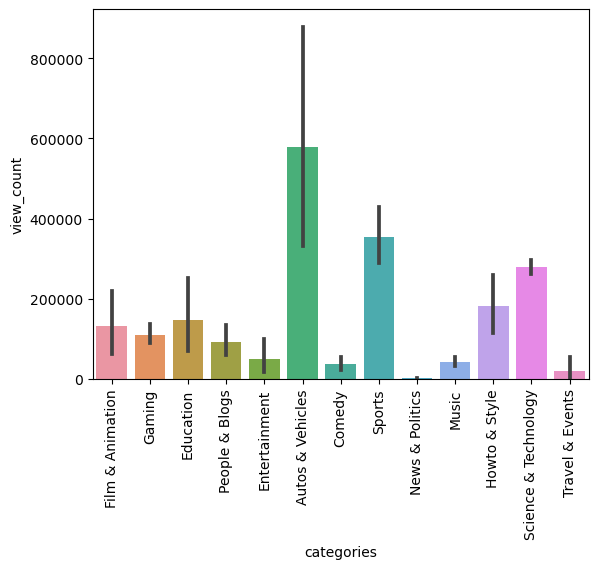

In [47]:
ax = sns.barplot(x="categories", y="view_count", data=df)
ax.tick_params(axis='x', rotation=90);

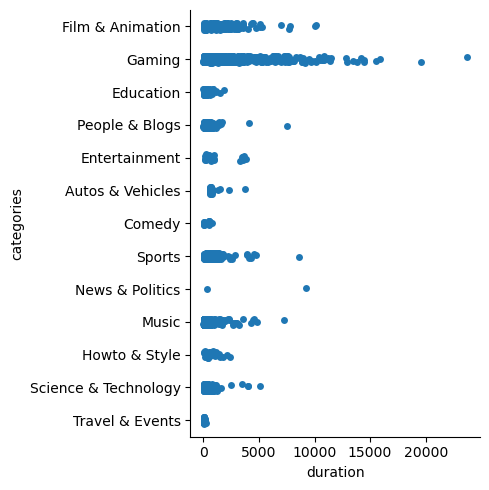

In [48]:
sns.catplot(data = df, x = "duration", y = "categories");

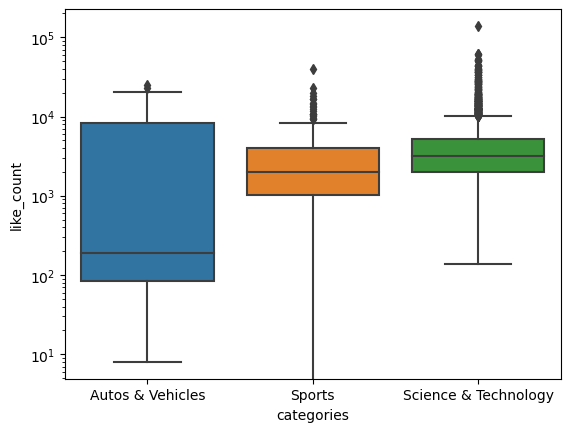

In [49]:
ax = sns.boxplot(x="categories", y="like_count", data=df.loc[df['categories'].isin(['Autos & Vehicles','Sports','Science & Technology'])])
ax.set(yscale="log");

In [50]:
# df[df['categories']=='Autos & Vehicles']['view_count'].hist(bins = 100);

In [51]:
df["upload_year"] = df['upload_date'].apply(lambda d: d.year)

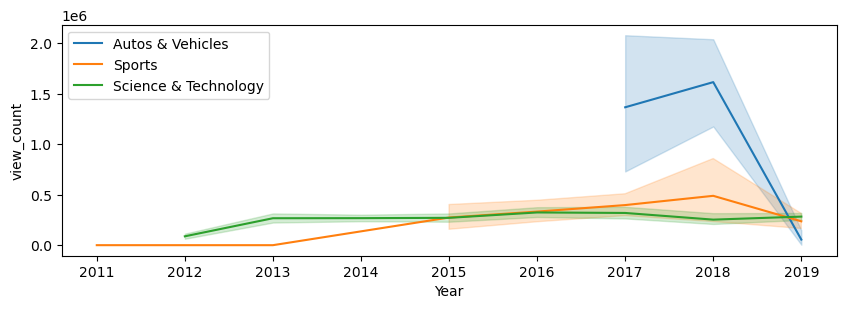

In [52]:
fig, axs = plt.subplots(1, 1, figsize=(10,3))
sns.lineplot(x="upload_year", y="view_count", data=df[df.categories == 'Autos & Vehicles'], label="Autos & Vehicles")
sns.lineplot(x="upload_year", y="view_count", data=df[df.categories == 'Sports'], label="Sports")
sns.lineplot(x="upload_year", y="view_count", data=df[df.categories == 'Science & Technology'], label="Science & Technology")
# axs.set(yscale="log")
axs.set_xlabel("Year");

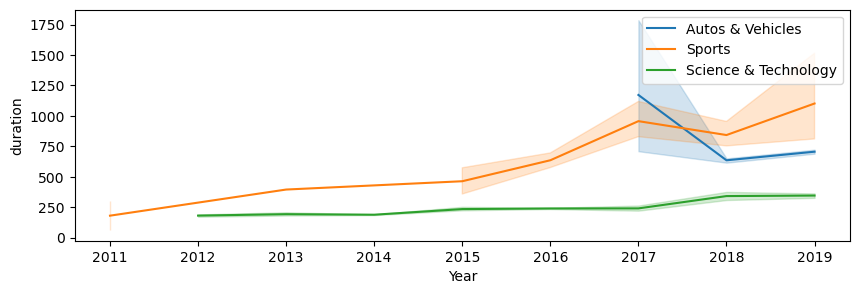

In [53]:
fig, axs = plt.subplots(1, 1, figsize=(10,3))
sns.lineplot(x="upload_year", y="duration", data=df[df.categories == 'Autos & Vehicles'], label="Autos & Vehicles")
sns.lineplot(x="upload_year", y="duration", data=df[df.categories == 'Sports'], label="Sports")
sns.lineplot(x="upload_year", y="duration", data=df[df.categories == 'Science & Technology'], label="Science & Technology")
# axs.set(yscale="log")
axs.set_xlabel("Year");

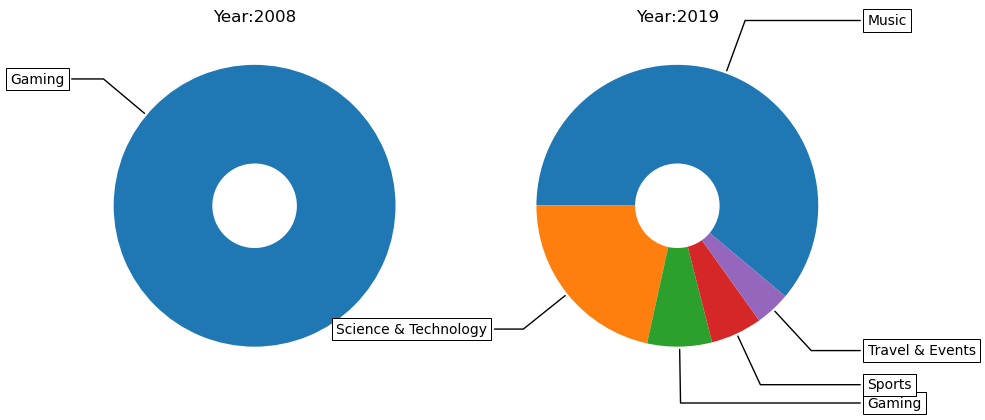

In [54]:
def set_labels(ax, wedges):
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
            bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(name[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                    horizontalalignment=horizontalalignment, **kw)


years = [2008, 2019]
fig = plt.figure(figsize=(10, 6))
for i in range(len(years)):
    ax = fig.add_subplot(1,2,i+1)
    data = df[df.upload_year==years[i]].categories.value_counts()[:5]
    name = data.index
    count = data.to_list()
    wedges, texts = ax.pie(count, wedgeprops=dict(width=0.7), startangle=-40)
    set_labels(ax, wedges)
    ax.set_title(f"Year:{years[i]}")


In [55]:
# discover the top tags

years = [2008, 2013, 2019]

for i in years:
    list_tags = df[df.upload_year==i]['tags'].astype(str).sum().lower().split(",")
    array = np.unique(list_tags, return_counts=True)
    x = np.argsort(array[1])[::-1][:10]
    print(f'The most popular tags for the year {i}:', array[0][x])

The most popular tags for the year 2008: ['ed' 'video' 'findlay' 'retrogamer3' 'gameplay' 'games' 'game' '10' 'dvd'
 'made']
The most popular tags for the year 2013: ['dnews' 'd news' 'discovery news' 'testtube' 'discovery' 'revision3'
 'science' 'discovery channel' 'test tube' 'anthony carboni']
The most popular tags for the year 2019: ['how' 'pianist' 'tutorial' 'on' 'creative' 'live' 'cover' 'musician' 'to'
 'play']


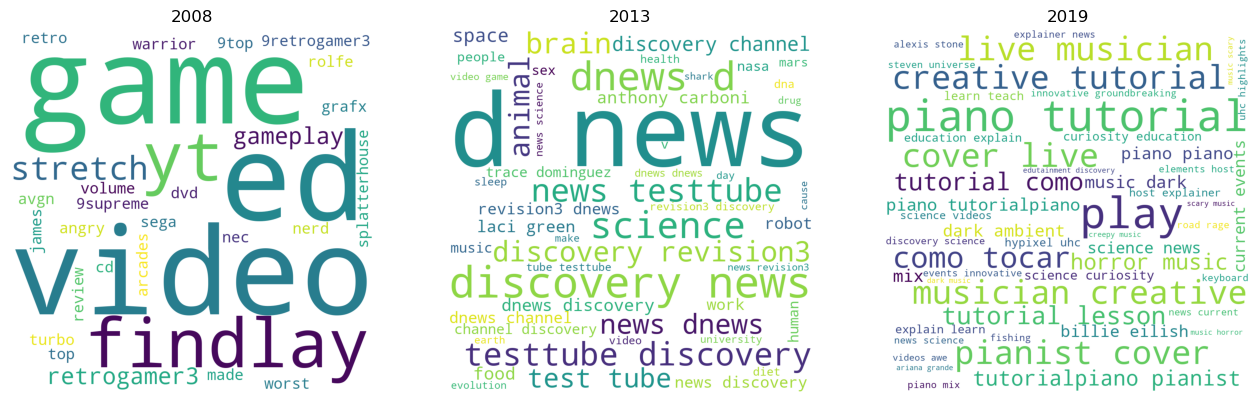

In [56]:
from wordcloud import WordCloud

# x, y = np.ogrid[:300, :300]
# mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
# mask = 255 * mask.astype(int)

def cloud(year):
    cloud = WordCloud(width = 1000, height = 1000,
                    background_color ='white',
                    max_words=50,
                    # mask=mask,
                    min_font_size = 5, max_font_size=1000).generate(df[df.upload_year==year]['tags'].astype(str).sum().lower())
    return cloud
 
# plot the WordCloud image                      
fig = plt.figure(figsize = (16, 16))
for i in range(len(years)):
    ax = fig.add_subplot(1,3,i+1)
    wordcloud = cloud(years[i])
    ax.set_title(str(years[i]))
    ax.imshow(wordcloud)
    ax.axis('off')

In [57]:
# lets look at 'video game' tag 

search_list = ['game', 'video game']
mask = df['tags'].str.contains('|'.join(search_list))
df_tag = df[mask]

In [58]:
np.unique(df_tag.categories, return_counts=True)

(array(['Education', 'Entertainment', 'Film & Animation', 'Gaming',
        'Music', 'People & Blogs', 'Science & Technology'], dtype=object),
 array([   1,    1,   20, 1295,   22,   18,   66]))

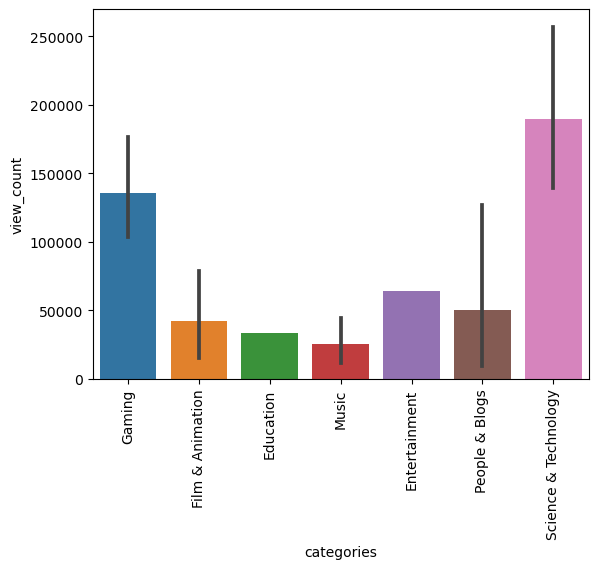

In [59]:
ax = sns.barplot(x="categories", y="view_count", data=df_tag)
ax.tick_params(axis='x', rotation=90);

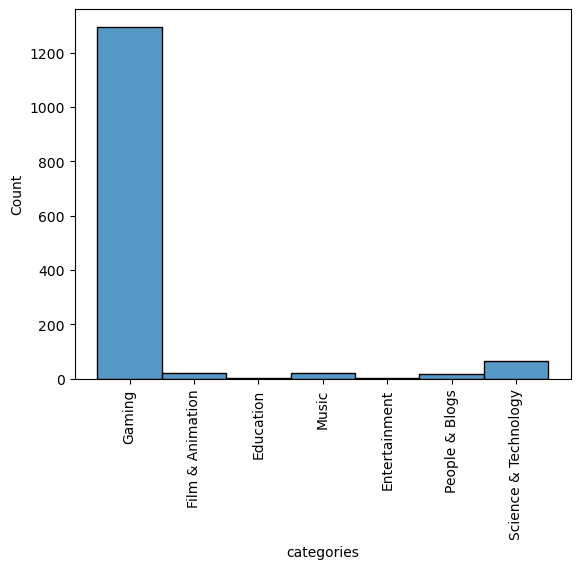

In [60]:
ax = sns.histplot(x="categories", data=df_tag)
ax.tick_params(axis='x', rotation=90);

In [61]:
def count_tags(x):
    return len(x.split(","))

df['count_tags'] = df['tags'].apply(count_tags)

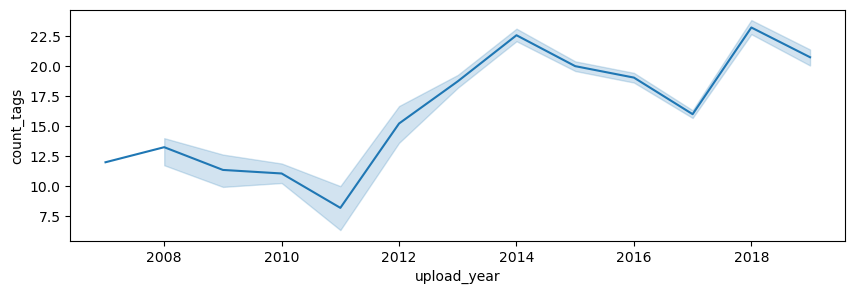

In [62]:
fig, axs = plt.subplots(1, 1, figsize=(10,3))
sns.lineplot(x="upload_year", y="count_tags", data=df);

In [63]:
# TODO: look through where the duration goes down and number of tags

In [64]:
# discover podcast

# search_list = ['podcast']
# mask = df['tags'].str.contains('|'.join(search_list))
# df_podcast = df[mask]

# (df_podcast['tags'].str.contains('podcast')).any()

# np.unique(df_podcast.categories)

# df_podcast.isnull().sum()

# len(np.unique(df_podcast.channel_id))

# plt.hist(df_podcast['upload_date']);
# plt.hist(df_podcast['view_count']);
# fig, axs = plt.subplots(1, 1, figsize=(10,3))

# sns.lineplot(x="upload_date", y="view_count", data=df_podcast, label="View")
# sns.lineplot(x="upload_date", y="like_count", data=df_podcast, label="Like")
# axs.set(yscale="log")
# axs.set_xlabel("Year");

In [65]:
# education vs. Entertainment

df_ed = df[df.categories == 'Education']
df_ent = df[df.categories == 'Entertainment'] # 29

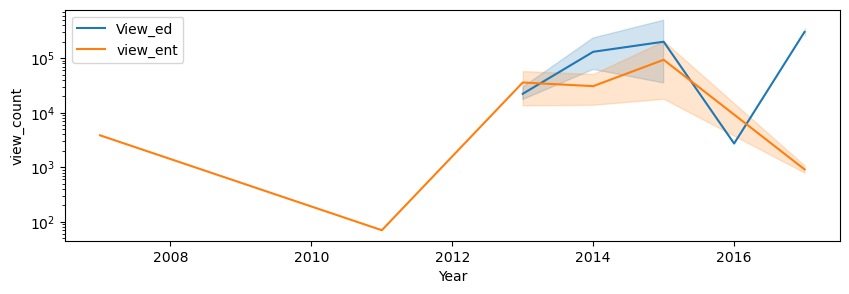

In [66]:
fig, axs = plt.subplots(1, 1, figsize=(10,3))
sns.lineplot(x="upload_year", y="view_count", data=df_ed, label="View_ed")
sns.lineplot(x="upload_year", y="view_count", data=df_ent, label="view_ent")
axs.set(yscale="log")
axs.set_xlabel("Year");

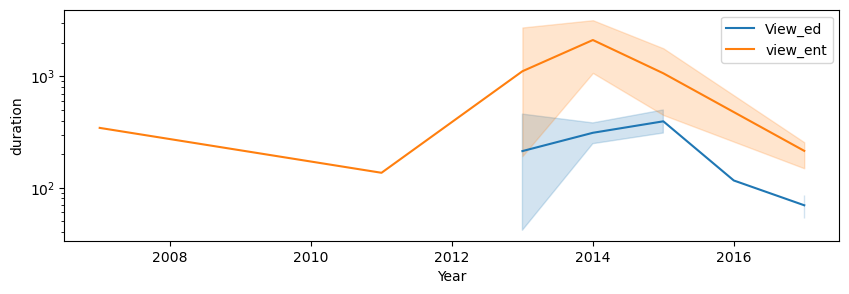

In [67]:
fig, axs = plt.subplots(1, 1, figsize=(10,3))
sns.lineplot(x="upload_year", y="duration", data=df_ed, label="View_ed")
sns.lineplot(x="upload_year", y="duration", data=df_ent, label="view_ent")
axs.set(yscale="log")
axs.set_xlabel("Year");